# Denoising filter testing
## required libaries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import functions as f

load_example = False

## load file

In [2]:
home_dir = os.path.abspath("")
if load_example:
	tiff_file = home_dir + os.sep + '84d tiff.tif'
	save_dir = home_dir
else:
    import tkinter as tk
    from tkinter import filedialog
    
    #remove root windows
    root = tk.Tk()
    root.withdraw()
    
    tiff_file = filedialog.askopenfilename(initialdir = home_dir,title = "select 8-Bit 3D CT-Tiff stack",filetypes = (("Tif file","*.tif"),("Tiff file","*.tiff")))
    save_dir  = os.path.dirname(tiff_file)
    
file_name = os.path.basename(tiff_file).split('.', 1)[0]
    
CT = f.CTPreprocessor(tiff_file, pore_threshold = 70)

Dimensions: w = 2088, h = 2070, z = 1450 [px]


## Show the loaded images

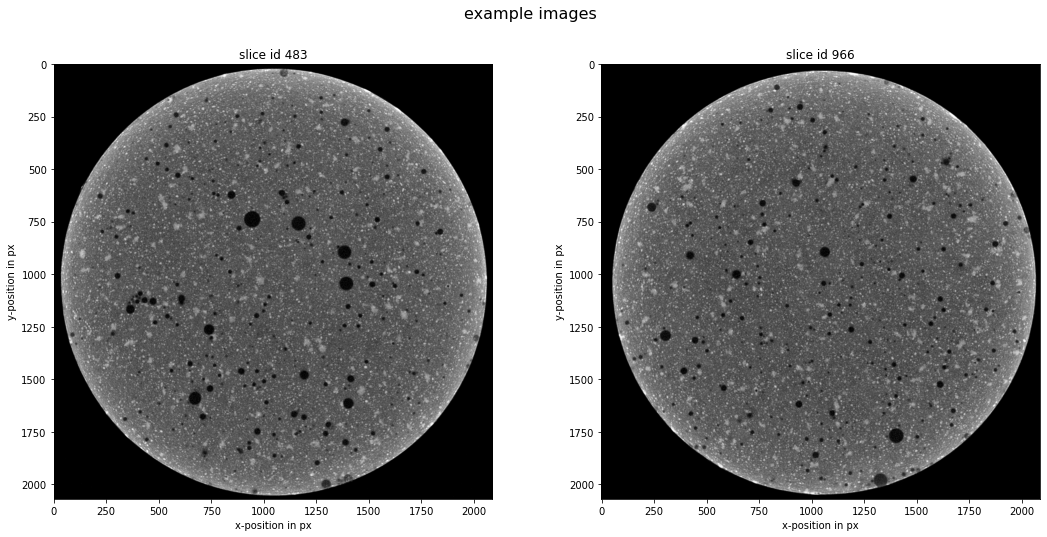

In [3]:
CT.show_example_slices()

## process the main circle, its center point and the inner pores

In [4]:
slice	= CT.select_slice(int(CT.z/3))

CT.slice.identify_main_circle()
CT.slice.get_main_circle()

CT.slice.identify_pores()
CT.slice.remove_pores();

found the center point at (1045, 1036). The circle has a maximum radius of 1034 px.


## show images

TypeError: unsupported operand type(s) for /: 'CTSlicePreprocessor' and 'int'

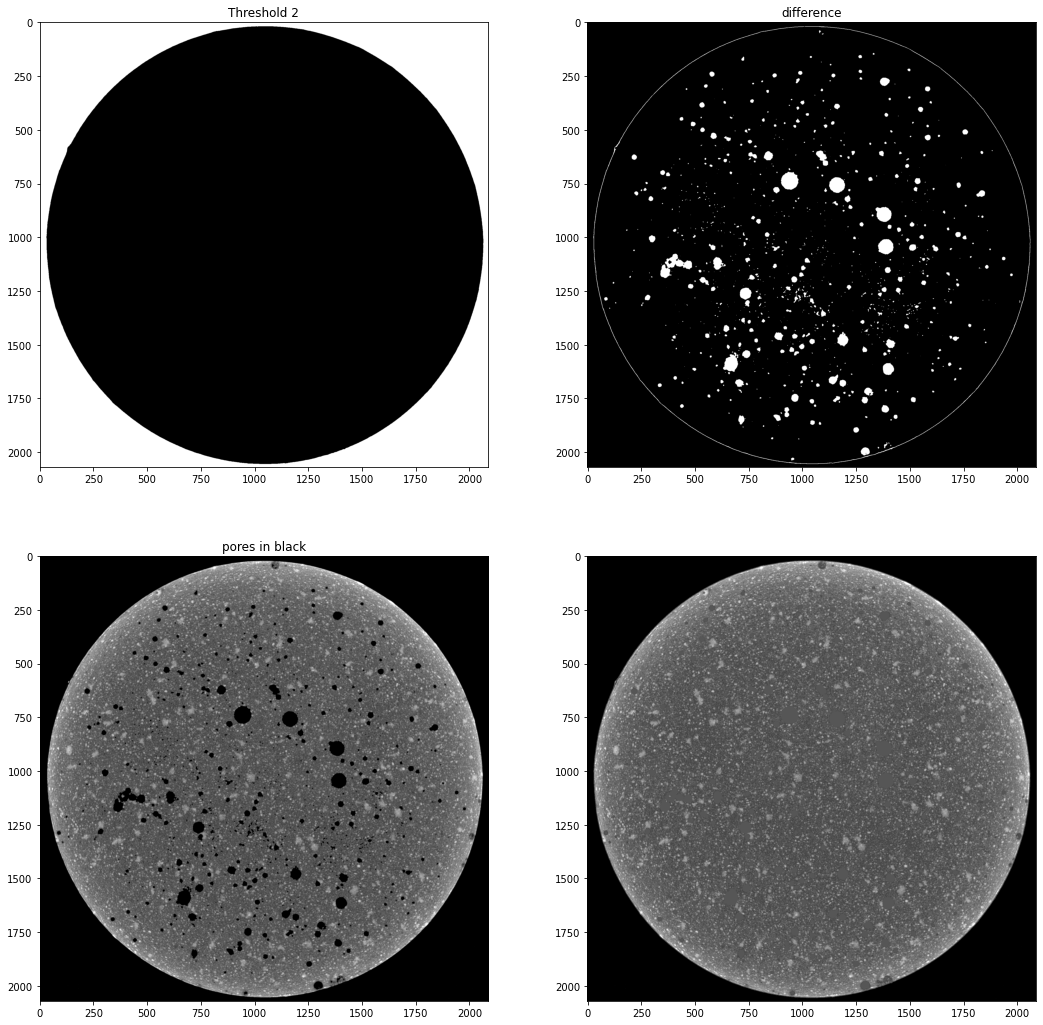

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(18, 18))
#fig.suptitle('raw images', fontsize=16)


ax[0, 0].imshow( CT.slice.main_circle, cmap='gray')
ax[0, 0].set_title( "Threshold 2" )

ax[0, 1].imshow( CT.slice.inner_pores*np.median( CT.slice.slice ), cmap='gray' )
ax[0, 1].set_title( "difference" )

ax[1, 0].imshow( CT.slice.slice * np.logical_not(CT.slice.inner_pores), cmap='gray' )
ax[1, 0].set_title( "pores in black" )

ax[1, 1].imshow( CT.slice.removed_pores , cmap='gray' )
ax[1, 1].set_title( "pores replaced with median value ({:.0f})".format(np.median( CT.slice )) )

plt.show()

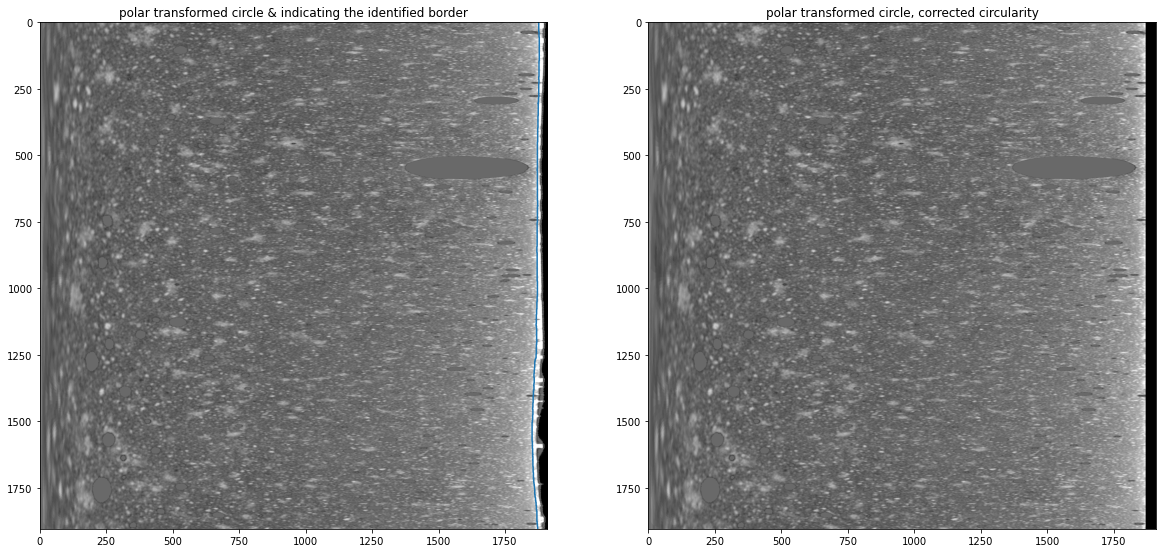

c + d^( d^( (x-x_0)/b ) )
x_0 = 476.56, b = 358.40, c = 103.27, d = 1.72


e:\GIT\CT_edge_hardening_remover\functions.py:16: RuntimeWarning: overflow encountered in power
  return c + d**(d**((x-x0)/b))


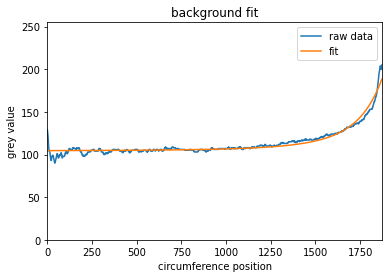

In [ ]:

import cv2
print("find border and correct circularity")
border_position, border_deviation = CT.slice.get_border_deviation(CT.slice.polar_image, show_graph = False)
polar_image_corr = CT.slice.correct_circularity( show_result = True )

print("fit background")
fit_data, polar_background, polar_background_fit, background_offset = CT.slice.get_polar_background(polar_image_corr)

print("process fixed image and transform it to circular")
fixed_image = (CT.slice.circle_to_polar(slice)-polar_background_fit)
unpolar = cv2.linearPolar(fixed_image,(CT.center[0], CT.center[1]), CT.min_length, cv2.WARP_INVERSE_MAP).clip(min=0)

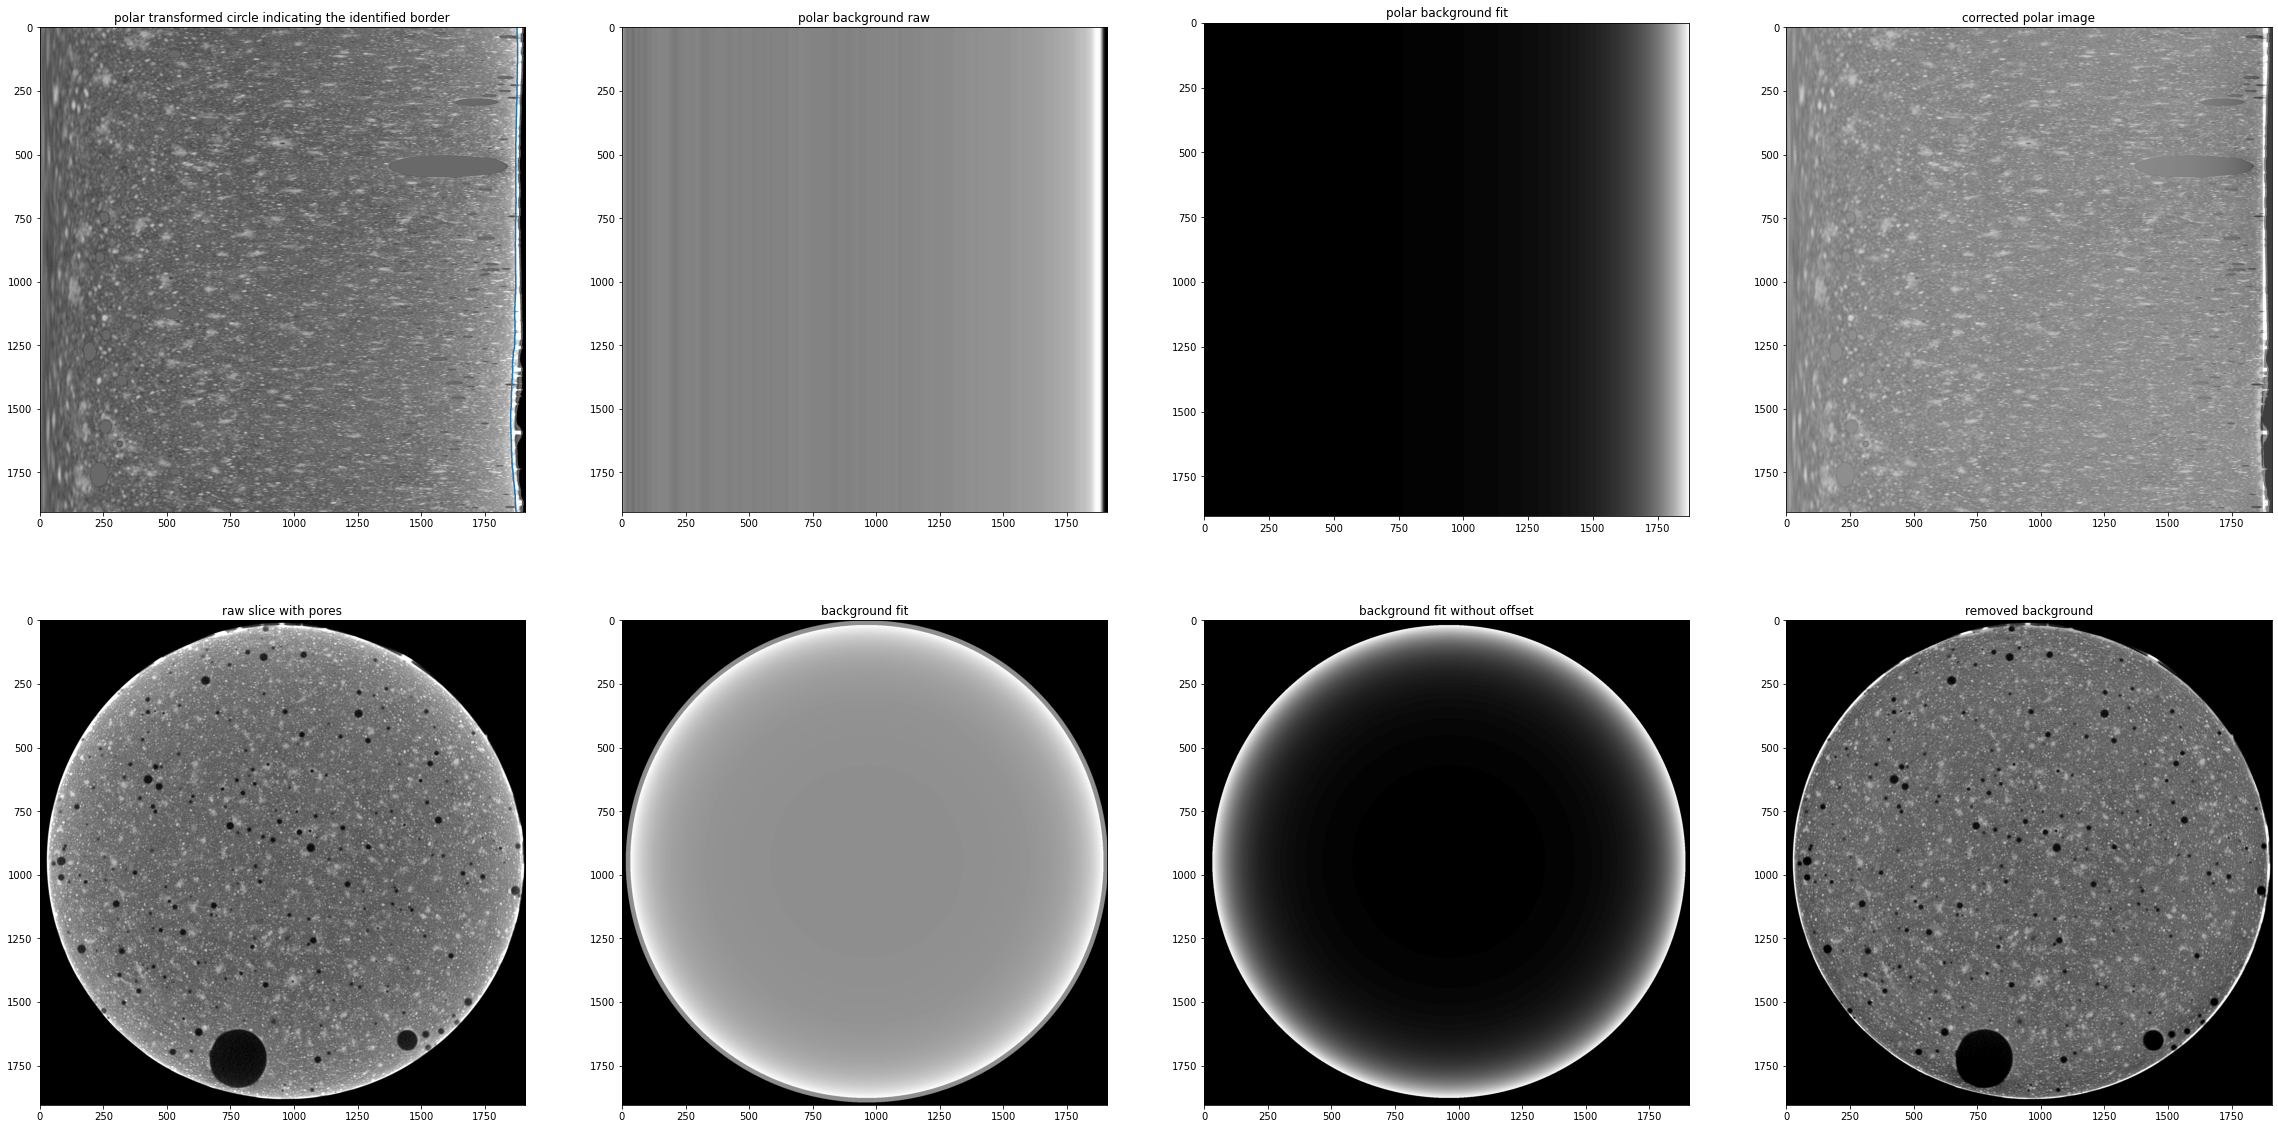

In [ ]:


fig, ax = plt.subplots(2,4, figsize=(40,20))
ax[0,0].imshow( CT.slice.polar_image, cmap='gray' )
ax[0,0].plot( border_position,range(len(border_position)) )
ax[0,0].set_title( "polar transformed circle indicating the identified border" )
ax[0,1].imshow( polar_background, cmap='gray' )
ax[0,1].set_title( "polar background raw" )
ax[0,2].imshow( polar_background_fit[:, 0:CT.slice.border_position], cmap='gray' )
ax[0,2].set_title( "polar background fit" )
ax[0,3].imshow( CT.slice.polar_image - polar_background_fit, cmap='gray' )
ax[0,3].set_title( "corrected polar image" )
ax[1,0].imshow( slice, cmap='gray' )
ax[1,0].set_title( "raw slice with pores" )
ax[1,1].imshow( CT.slice.polar_to_circle( polar_background_fit+background_offset ), cmap='gray' )
ax[1,1].set_title( "background fit" )
ax[1,2].imshow( CT.slice.polar_to_circle( polar_background_fit ), cmap='gray' )
ax[1,2].set_title( "background fit without offset" )
ax[1,3].imshow( unpolar, cmap='gray' )
ax[1,3].set_title( "removed background" )
plt.show()

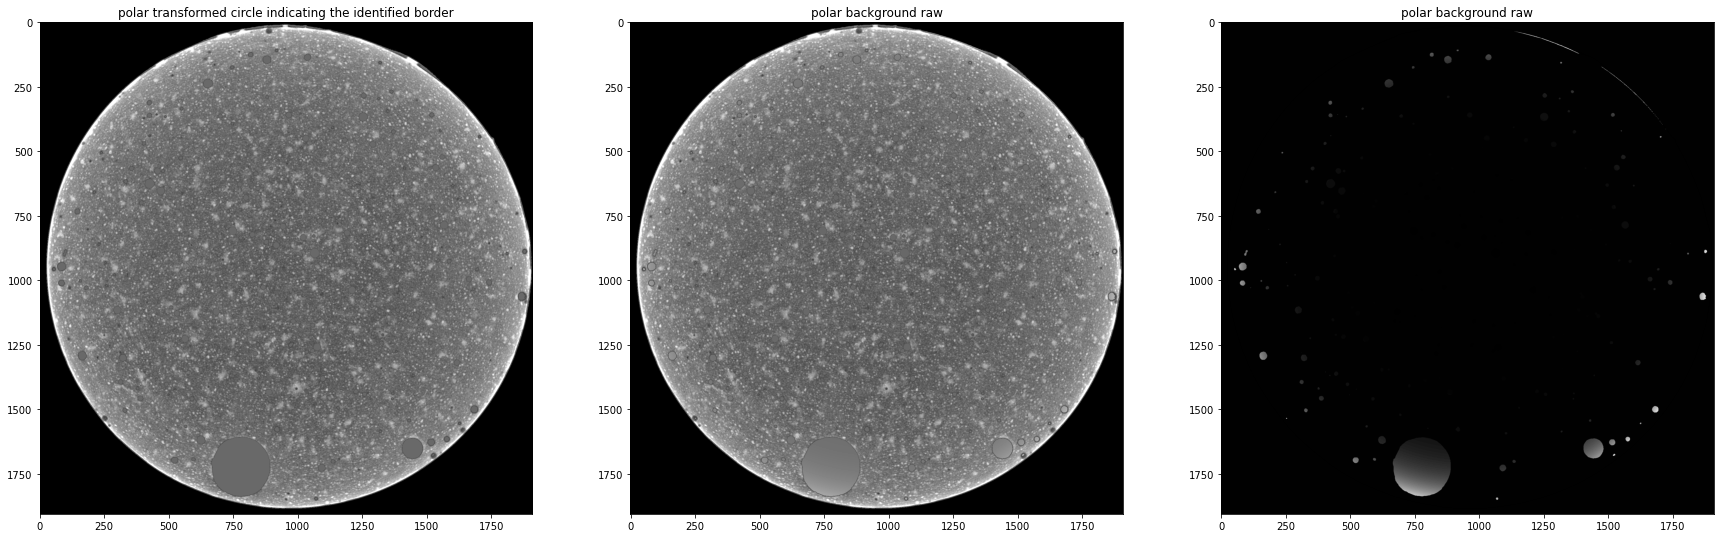

In [ ]:

removed_pores2 = CT.slice.slice * np.logical_not(CT.slice.inner_pores) + CT.slice.inner_pores * (CT.slice.polar_to_circle( polar_background_fit+background_offset ))

fig, ax = plt.subplots(1,3, figsize=(30,25))
ax[0].imshow( CT.slice.removed_pores, cmap='gray' )
ax[0].set_title( "polar transformed circle indicating the identified border" )
ax[1].imshow( removed_pores2, cmap='gray' )
ax[1].set_title( "polar background raw" )
ax[2].imshow( removed_pores2-CT.slice.removed_pores, cmap='gray' )
ax[2].set_title( "polar background raw" )
plt.show()

In [ ]:
"""
blur = cv2.GaussianBlur( unpolar.astype(np.uint8), (11,11), 0)
inner_pores2 = (np.array(cv2.threshold( blur, 70, 255, cv2.THRESH_BINARY_INV )[1]) - CT.main_circle)/255
#(self.pore_thresh - self.main_circle)/255
removed_pores3 = (CT.slice * np.logical_not(inner_pores2) + inner_pores2 * (CT.polar_to_circle( polar_background_fit+background_offset )))#.astype(np.uint8)


fig, ax = plt.subplots(2,3, figsize=(30,20))
ax[0,0].imshow( inner_pores2, cmap='gray' )
ax[0,0].set_title( "Inner pores after initial correction" )
ax[0,1].imshow( CT.inner_pores, cmap='gray' )
ax[0,1].set_title( "initial pores" )
ax[0,2].imshow( unpolar.astype(np.uint8), cmap='gray' )
ax[0,2].set_title( "Corrected dataset with pores" )
ax[1,0].imshow( CT.removed_pores, cmap='gray' )
ax[1,0].set_title( "raw dataset without pores, (filled mean)" )
ax[1,1].imshow( removed_pores3, cmap='gray' )
ax[1,1].set_title( "raw dataset without pores, (filled bg-fit)" )
ax[1,2].imshow( (removed_pores3-CT.removed_pores).clip(min=0), cmap='gray' )
ax[1,2].set_title( "difference" )
plt.show()
"""

'\nblur = cv2.GaussianBlur( unpolar.astype(np.uint8), (11,11), 0)\ninner_pores2 = (np.array(cv2.threshold( blur, 70, 255, cv2.THRESH_BINARY_INV )[1]) - CT.main_circle)/255\n#(self.pore_thresh - self.main_circle)/255\nremoved_pores3 = (CT.slice * np.logical_not(inner_pores2) + inner_pores2 * (CT.polar_to_circle( polar_background_fit+background_offset )))#.astype(np.uint8)\n\n\nfig, ax = plt.subplots(2,3, figsize=(30,20))\nax[0,0].imshow( inner_pores2, cmap=\'gray\' )\nax[0,0].set_title( "Inner pores after initial correction" )\nax[0,1].imshow( CT.inner_pores, cmap=\'gray\' )\nax[0,1].set_title( "initial pores" )\nax[0,2].imshow( unpolar.astype(np.uint8), cmap=\'gray\' )\nax[0,2].set_title( "Corrected dataset with pores" )\nax[1,0].imshow( CT.removed_pores, cmap=\'gray\' )\nax[1,0].set_title( "raw dataset without pores, (filled mean)" )\nax[1,1].imshow( removed_pores3, cmap=\'gray\' )\nax[1,1].set_title( "raw dataset without pores, (filled bg-fit)" )\nax[1,2].imshow( (removed_pores3-CT.r

## retry correction

Calculating initial background.
c + d^( d^( (x-x_0)/b ) )
x_0 = 476.56, b = 358.40, c = 103.27, d = 1.72

Iteration #1 of 3
c + d^( d^( (x-x_0)/b ) )
x_0 = 390.82, b = 380.55, c = 102.99, d = 1.72


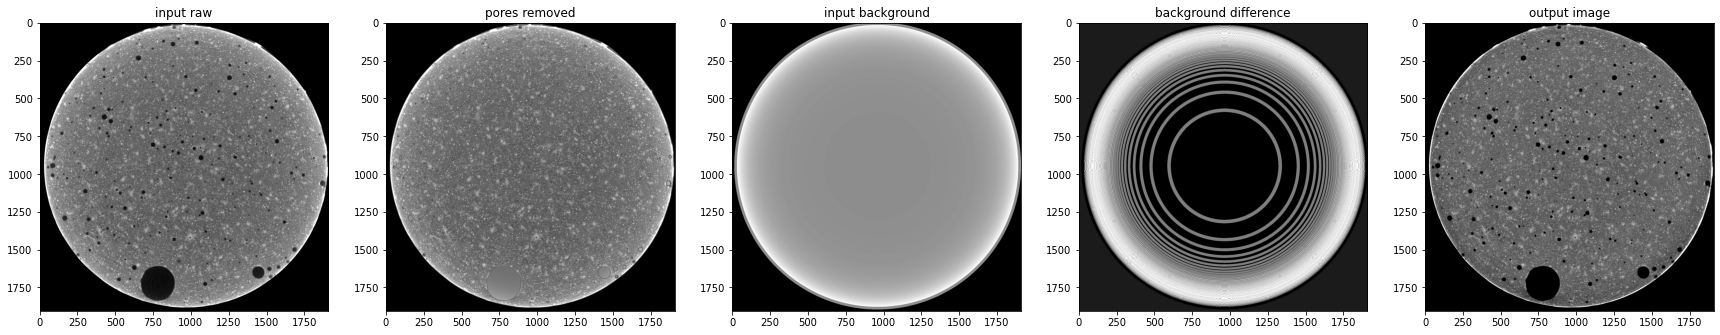


Iteration #2 of 3
c + d^( d^( (x-x_0)/b ) )
x_0 = 384.70, b = 382.14, c = 102.97, d = 1.72


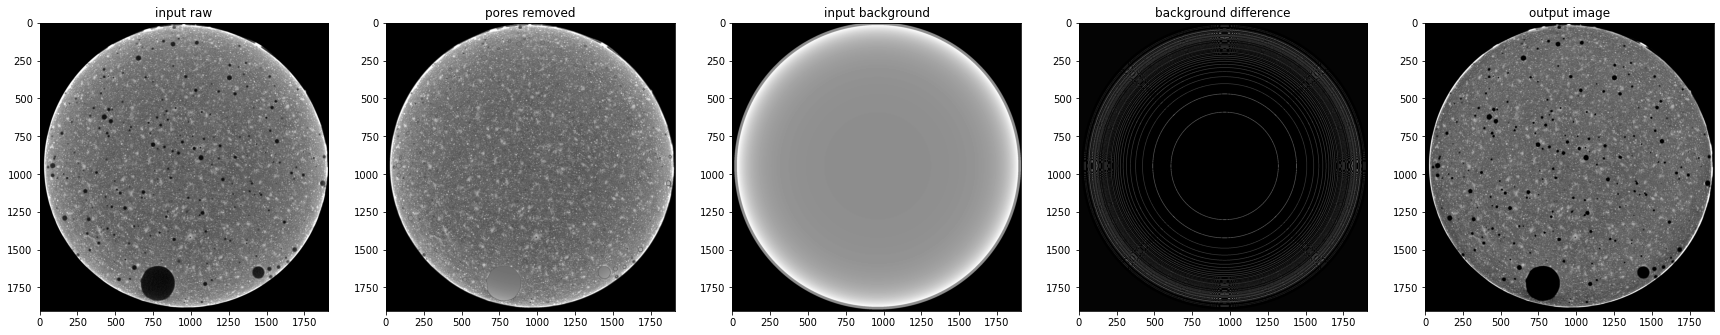


Iteration #3 of 3
c + d^( d^( (x-x_0)/b ) )
x_0 = 383.90, b = 382.35, c = 102.97, d = 1.72


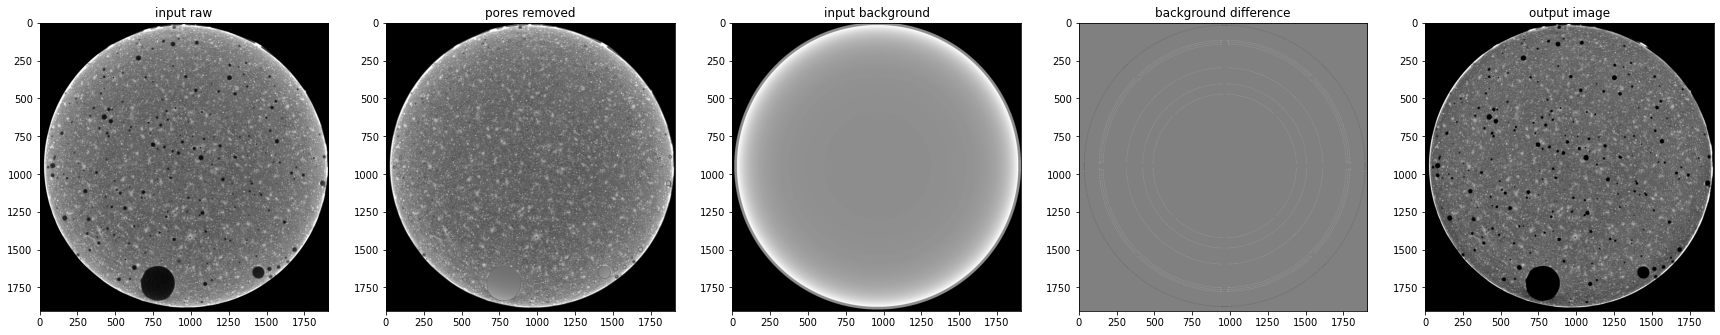

: 

In [ ]:
polar_background_fit, background, fixed = CT.slice.fix_background( iterations= 3, verbose_level = 1 )